<a href="https://colab.research.google.com/github/juanosalvador/Optimal-Value-for-epsilon-DBSCAN/blob/main/Hiperparameter_Tunning_The_Optimal_Value_For_Epsilon_(EPS).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## Librerías de cálculo, manipulación y tratamiento de datos
import pandas as pd
import numpy as np
## Librerías de visualización de datos
import seaborn as sns
import matplotlib.pyplot as plt
#sklearn
#from sklearn import cluster, datasets, mixture
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
## sklearn
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

sns.set()

Hi there! In this entries we calculate the optimal value for epsilon using a heuristic method. The method that we use is KNN in order to select the avegare distance of a k neigbohrs. We try with difference value for K.

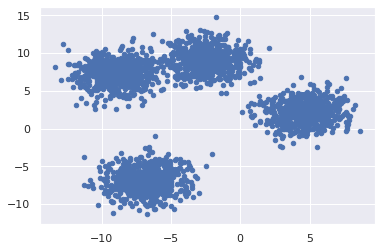

In [2]:
## Load synthetic date
# blobs with varied variances
n_samples = 2500
n_features = 2
n_clusters = 4
random_state = 42
#max_iter = 100

X, y = make_blobs(n_samples=n_samples, 
                  n_features=n_features, 
                  cluster_std=1.5,
                  centers=n_clusters, 
                  random_state=random_state)
plt.scatter(X[:,0],X[:,1], s = 20)
plt.show()

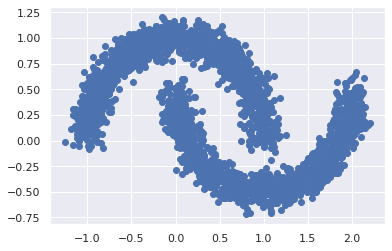

In [3]:
## make moon
Xm, ym = make_moons(2500, noise=0.09, random_state=0)
plt.scatter(Xm[:,0], Xm[:,1])
plt.show()

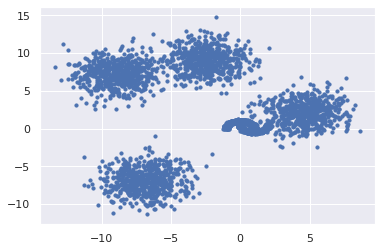

In [4]:
## Concatenate numpy arrays
X = np.concatenate((X,Xm),axis = 0)
plt.scatter(X[:,0], X[:,1], s = 10)

In [5]:
################## DBSCAN######################
# Escalamos los datos
X_scaled = StandardScaler().fit_transform(X)


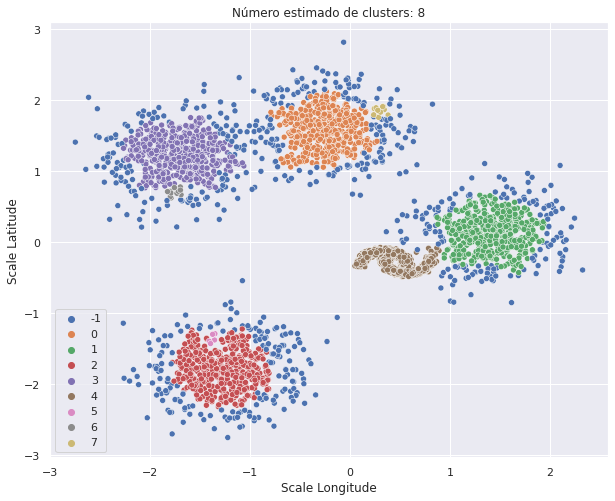

In [6]:
"""Datos Escalados"""
# Entrada de datos
eps = 0.09
min_samples = 10
#
db = DBSCAN(eps= eps, min_samples=min_samples).fit(X_scaled)
labels = db.labels_

### Visualización
fig = plt.figure(figsize=(10, 8))
#sns.scatterplot(x = X_scaled[:,0], y = X_scaled[:,1], hue=["cluster-{}".format(x) for x in labels])
sns.scatterplot(x = X_scaled[:,0], y = X_scaled[:,1], hue=labels,  palette='deep')
plt.title('Número estimado de clusters: %d' % (len(np.unique(labels))-1))
plt.xlabel('Scale Longitude')
plt.ylabel('Scale Latitude')
plt.show()

Estimated number of clusters: 8
Estimated number of noise points: 657
Silhouette Coefficient: 0.386


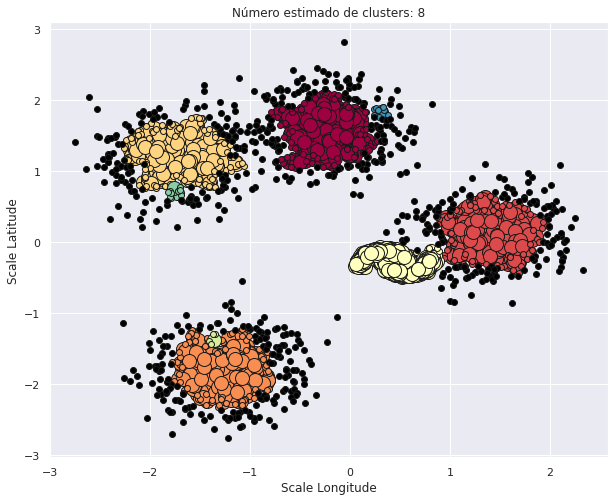

In [7]:
import numpy as np
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
unique_labels = np.unique(labels)
n_clusters_ = len(unique_labels) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

# Black removed and is used for noise instead.
plt.figure(figsize=(10,8))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X_scaled[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X_scaled[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Número estimado de clusters: %d' % n_clusters_)
plt.xlabel('Scale Longitude')
plt.ylabel('Scale Latitude')

from sklearn import metrics
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X_scaled, labels))
plt.show() 

# Tunning epsilon

In [8]:
from sklearn.neighbors import NearestNeighbors

In [9]:
k = 20 ## vecinos más cercanos
#epsilon = 0.09 ## anterior
neigh = NearestNeighbors(n_neighbors= k, metric='euclidean')
nbrs = neigh.fit(X_scaled)
distances1, indices = nbrs.kneighbors(X_scaled)

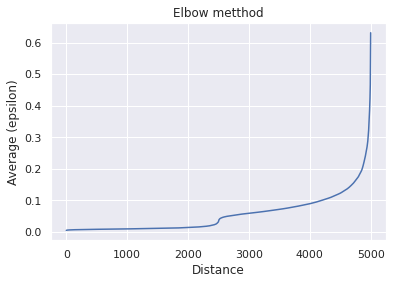

In [10]:
neigh = NearestNeighbors(n_neighbors= k, metric='euclidean')
nbrs = neigh.fit(X_scaled)
distances1, indices = nbrs.kneighbors(X_scaled)
distances1 = np.sort(distances1, axis=0)
### probando
distance_matrix, index = nbrs.kneighbors(X_scaled)
distance_matrix_sort = np.sort(distance_matrix, axis = 0)
## Obentenemos la media de la matriz de distancias, dejamos fuera el primer vecino ya que es el mismo punto
distances1 = distances1[:,1:].mean(1)
plt.plot(distances1)
plt.title("Elbow metthod")
plt.xlabel("Distance")
plt.ylabel("Average (epsilon)")
plt.show()

# Encontrando el punto en el codo

In [12]:
#!pip install kneed

4529


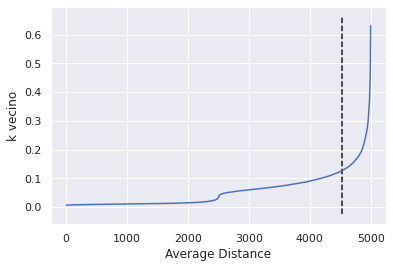

In [31]:
from kneed import KneeLocator
kn = KneeLocator(range(1, len(distances1)+1) ,distances1,  curve='convex', direction='increasing')
print(kn.knee)
import matplotlib.pyplot as plt
plt.xlabel('Average Distance')
plt.ylabel('k vecino')
plt.plot(range(1, len(distances1)+1), distances1)
plt.vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
plt.show()

In [32]:
distancia = kn.knee
epsilon = distances1[distancia]
epsilon 

0.1262288009171053

In [29]:
 #### DBSCAN Datos Escalados###
 ##DBSCAN
#k = 65 ## vecinos más cercanos
#epsilon = 0.09 ## anterior
db = DBSCAN(eps= epsilon, metric='euclidean', min_samples= k).fit(X_scaled)
labels = db.labels_

####
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

unique_labels = np.unique(labels)
n_clusters_ = len(unique_labels) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

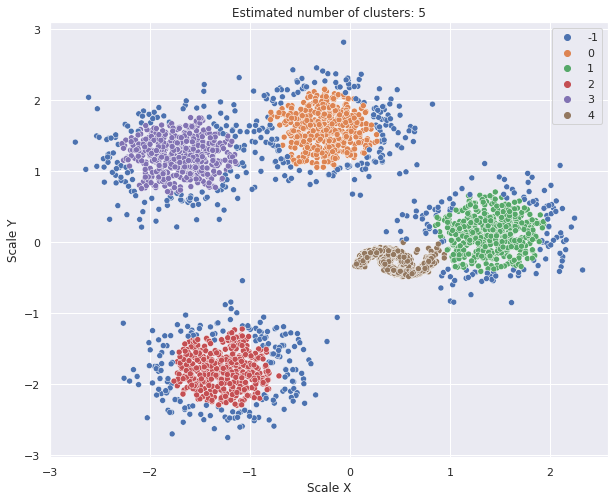

Estimated number of clusters: 5
Estimated number of noise points: 631
Silhouette Coefficient: 0.538


In [34]:
plt.figure(figsize=(10,8))
sns.scatterplot(x = X_scaled[:,0], y = X_scaled[:,1], hue=labels,  palette='deep')
plt.title('Estimated number of clusters: %d' % (len(np.unique(labels))-1) )
plt.xlabel('Scale X')
plt.ylabel('Scale Y')
plt.show()

from sklearn import metrics
print('Estimated number of clusters: %d' % n_clusters_ )
print('Estimated number of noise points: %d' % n_noise_ )
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X_scaled, labels))

In [35]:
np.unique(labels, return_counts= True)

(array([-1,  0,  1,  2,  3,  4]), array([ 631,  451,  479,  441,  481, 2517]))

Estimated number of clusters: 5
Estimated number of noise points: 631
Silhouette Coefficient: 0.538


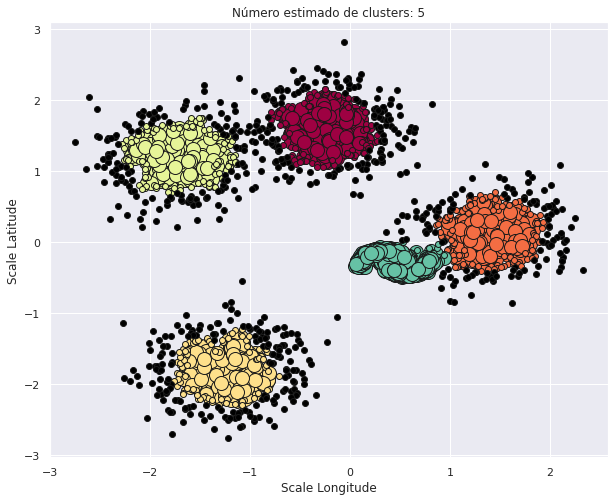

In [36]:
import numpy as np
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
unique_labels = np.unique(labels)
n_clusters_ = len(unique_labels) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

# Black removed and is used for noise instead.
plt.figure(figsize=(10,8))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X_scaled[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X_scaled[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Número estimado de clusters: %d' % n_clusters_)
plt.xlabel('Scale Longitude')
plt.ylabel('Scale Latitude')

from sklearn import metrics
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X_scaled, labels))
plt.show() 

# How to find the optimal value of K in KNN?